In [28]:
import numpy as np
import sys
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from astropy.io import fits
import seaborn as sns
from astropy.table import Table
from sklearn.neighbors import KernelDensity
import cPickle
# Note that astropy also has a modification of hist that does the same as this one.
from astroML.plotting import hist
%matplotlib inline

In [29]:
def pickle_to_file(data, fname):
    """Save a variable simply to a file"""
    try:
        fh = open(fname, 'w')
        cPickle.dump(data, fh)
        fh.close()
    except:
        print "Pickling failed!", sys.exc_info()[0]

def pickle_from_file(fname):
    """Restore a variable saved with pickle_to_file"""
    try:
        fh = open(fname, 'r')
        data = cPickle.load(fh)
        fh.close()
    except:
        print "Loading pickled data failed!", sys.exc_info()[0]
        data = None

    return data

In [33]:
#Dictionary
d = pickle_from_file('/Users/guadalupecanasherrera/DDM2017/Datasets/mysterious-peaks.pkl')
print len(d)

4275


In [8]:
def plot_histogram(data, binning_style, label, ax=None, xmin=10, xmax=17):
    """
    Convenience routine for plotting a histogram.
    """

    if ax is not None:
        ax = plt.axes(ax)

    counts, bins, patches = hist(data, bins=binning_style, ax=ax,
                                 color='k', histtype='step', normed=True)
    ax.text(0.95, 0.93, '{0:s}:\n{1:d} bins'.format(label, len(counts)),
            transform=ax.transAxes, ha='right', va='top')

    # Turn off y-axis labeling.
    ax.yaxis.set_major_formatter(plt.NullFormatter())

    ax.set_xlim(xmin, xmax)

    return ax

11


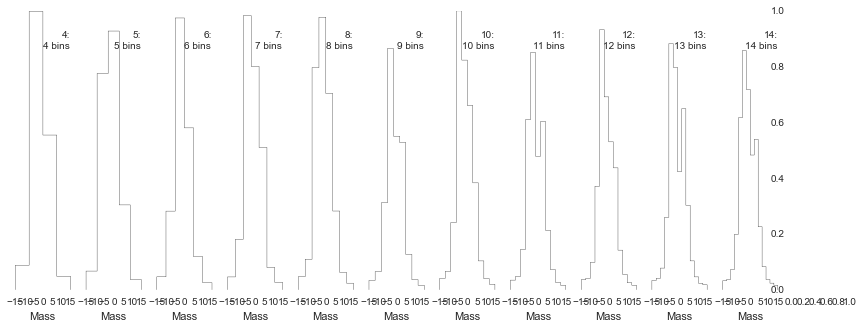

In [19]:
# a) For widths from 1 to 7
fig, ax = plt.subplots(1, 12, figsize=(15, 5))
styles = [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
titles = ['4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14']
print len(titles)
for i in range(len(styles)):
    axis = plot_histogram(d, styles[i], titles[i], ax=ax[i], xmin=np.min(d)-1, xmax=np.max(d)+1)
    ax[i].set_xlabel('Mass')
    
#Maybe the best is between 5 and 7

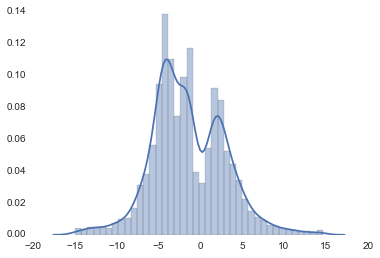

In [38]:
#Try with seaborn
import seaborn as sns
sns.distplot(d)

In [37]:
#I would say we have 2 or three peaks

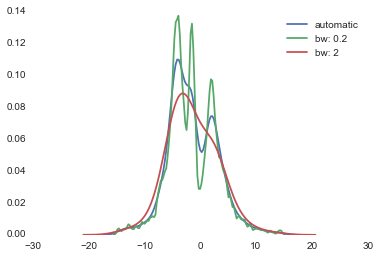

In [43]:
plt.figure()
sns.kdeplot(d, label="automatic")
sns.kdeplot(d, bw=.2, label="bw: 0.2")
sns.kdeplot(d, bw=2, label="bw: 2")
plt.legend();